<a href="https://colab.research.google.com/github/CanisiusAVC/GitHub_Projets/blob/master/Squirrel_package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd
import matplotlib 
#%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer
from matplotlib import pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = None

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [0]:
db = pd.read_csv("/iris.csv")

In [0]:
db.shape
db.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
db.dtypes
db.set_index(df["Id"], inplace=True)
df = db.drop(columns="Id").copy()

In [0]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
number_res = df.select_dtypes(exclude="object").describe()
number_res

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
number_res = df.select_dtypes(include="number").describe()
colnames = number_res.columns
#sns.pairplot(df[colnames])

In [0]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [0]:

missing_values_table(df)

Your selected dataframe has 5 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [0]:

print("Pearson Correlation Matrix\n")
corrMat_pearson = pd.DataFrame(df.select_dtypes(include="number").corr(method='pearson'))
print(corrMat_kendal)

print("\nSpearan Correlation Matrix\n")
corrMat_spearman = pd.DataFrame(df.select_dtypes(include="number").corr(method='spearman'))
print(corrMat_pearson)

print("\nKenadall Correlation Matrix\n")
corrMat_kendal = pd.DataFrame(df.select_dtypes(include="number").corr(method='kendall'))
print(corrMat_spearman)




Pearson Correlation Matrix
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.072112       0.717624      0.654960
SepalWidthCm       -0.072112      1.000000      -0.182391     -0.146988
PetalLengthCm       0.717624     -0.182391       1.000000      0.803014
PetalWidthCm        0.654960     -0.146988       0.803014      1.000000

Spearan Correlation Matrix

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000

Kenadall Correlation Matrix

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.159457       0.881386      0.834421
SepalWidthCm       -0.159457      1.000000      -0

In [0]:
#Build function fo stat descriptive

In [0]:
def resum(dataframe):  
#This code help you visualise distribution among continuous variable and one categorial variable
#1.First check your feature types with dataframe.dtypes
#2.If need convert categorial to "category" type
#3.Selcect all the continous variable and one categorial and run your code
#4.You will find inside : distribution of continuous variables
                        #sumarise stat on all variables
                        #box plot within all countinuous and the category features
                        #scatter plot with the category variable as hue
    import pandas as pd
    import numpy as np 
    import seaborn as sns
    import matplotlib as mp
    from matplotlib import pyplot as plt
    from itertools import cycle
    
    number_res = pd.DataFrame(df.select_dtypes(include="number").describe())
    cat_res = pd.DataFrame(df.select_dtypes(exclude="number").describe())
    cat=cat_res.columns[0]
    hue = pd.DataFrame(df[df.select_dtypes(exclude="number").columns[0]].dropna())
    cat = hue.columns[0]
    
    print("Continuous feature descritpion\n")
    print(number_res)
    
    print("\nCategory description\n")
    print(cat_res)
    
    
    print("\nPearson Correlation Matrix\n")
    corrMat_pearson = pd.DataFrame(df.select_dtypes(include="number").corr(method='pearson'))
    print(corrMat_kendal)
   
    print("\nSpearan Correlation Matrix\n")
    corrMat_spearman = pd.DataFrame(df.select_dtypes(include="number").corr(method='spearman'))
    print(corrMat_pearson)
   
    print("\nKenadall Correlation Matrix\n")
    corrMat_kendal = pd.DataFrame(df.select_dtypes(include="number").corr(method='kendall'))
    print(corrMat_spearman)
    
    for x in number_res.columns:
        
        ax = sns.distplot(df[x])
        ax.set(ylabel='Proportion')
        ax.set(title =x + " Distribution")
        plt.show()

    b=sns.pairplot(df,hue=cat)
    plt.show()
        
    for x in number_res.columns:
        ax = sns.boxplot(df[x], df[cat], data=df)
        ax.set(title =x + " Distribution en fonction de " + cat)
        plt.show()
    
        

Continuous feature descritpion
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000
Category description
               Species
count              150
unique               3
top     Iris-virginica
freq                50
Correlation between variable : spearman corf
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.159457       0.881386      0.834421
SepalWidthCm       -0.159457      1.000000      -0.303421     -0.277

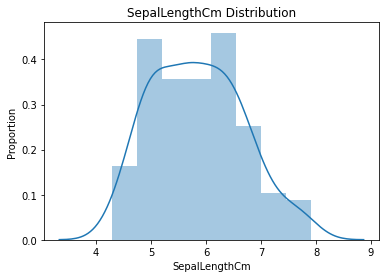

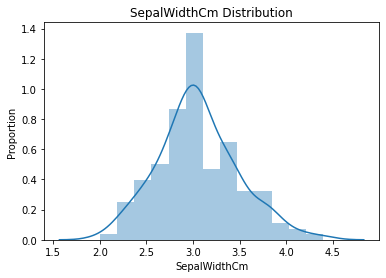

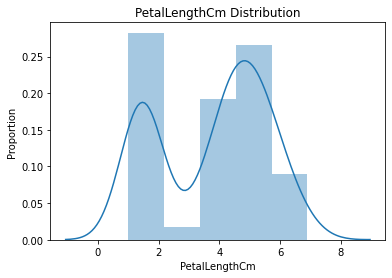

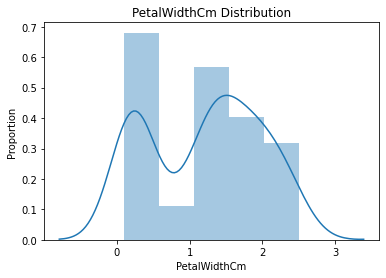

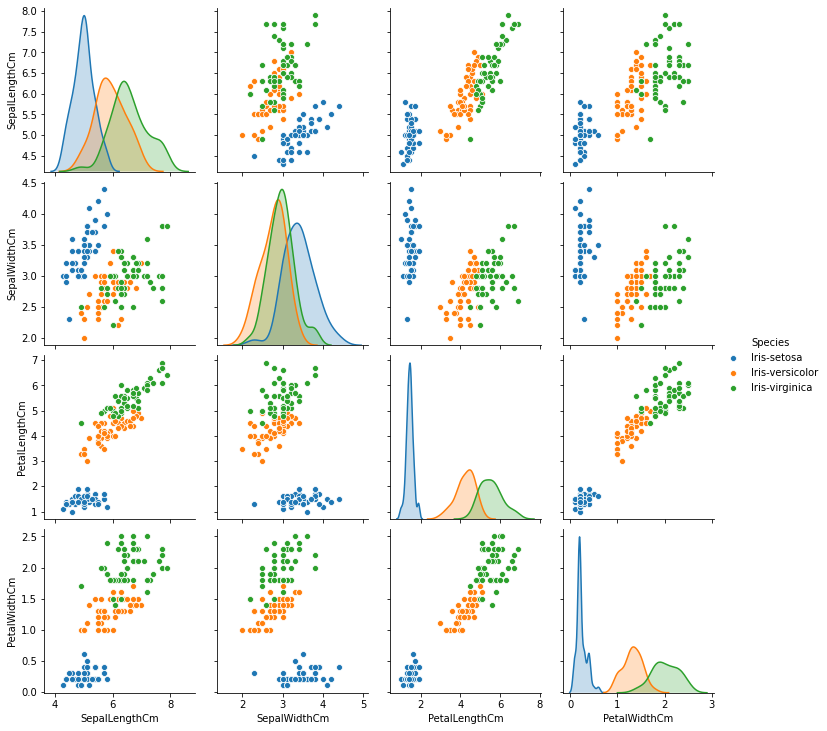

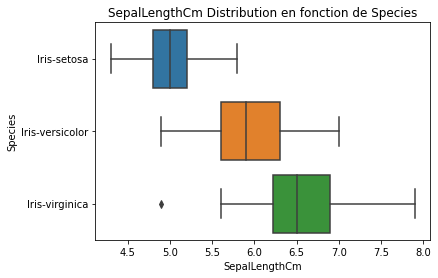

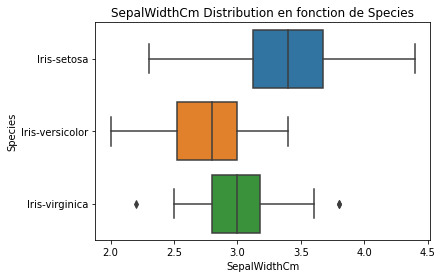

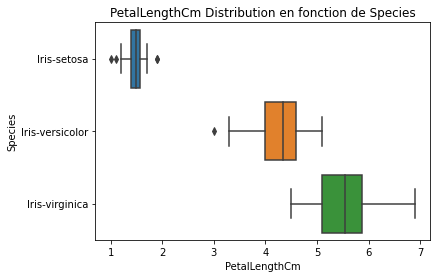

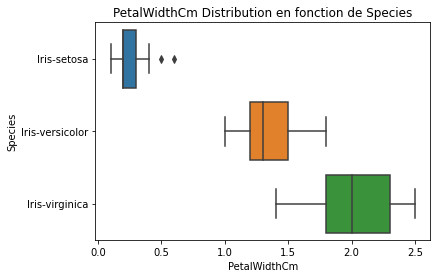

In [0]:
resum(df)

# profile = ProfileReport(df,title='Titanic Report', explorative = True)

In [0]:
profile.to_file("output.html")